In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

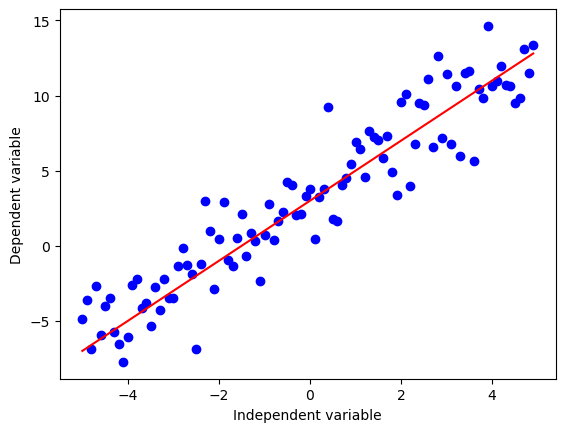

In [25]:
# Linear function: 2x + 3
x = np.arange(-5.0, 5.0, 0.1)

y = 2 * (x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x, ydata,  "bo")
plt.plot(x, y, "r") 

plt.ylabel("Dependent variable")
plt.xlabel("Independent variable")
plt.show()

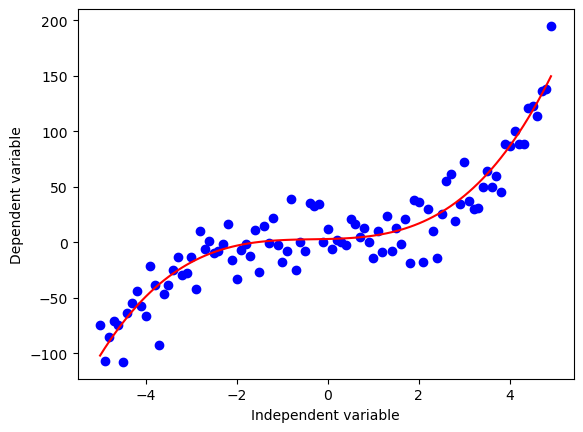

In [26]:
# Cubic fuction
x = np.arange(-5.0, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x, ydata,  "bo")
plt.plot(x, y, "r") 

plt.ylabel("Dependent variable")
plt.xlabel("Independent variable")
plt.show()

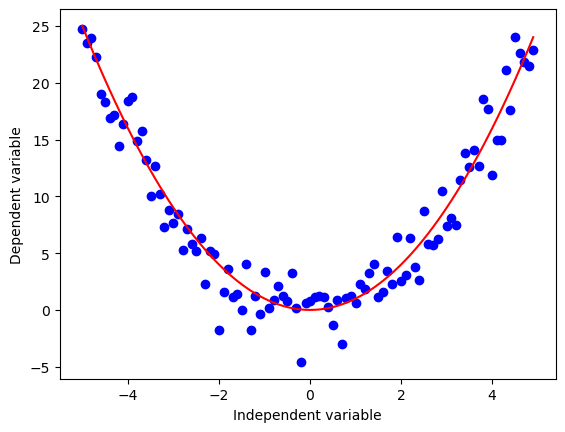

In [27]:
# Quadratic function
x = np.arange(-5.0, 5.0, 0.1)

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

plt.plot(x, ydata,  "bo")
plt.plot(x, y, "r") 

plt.ylabel("Dependent variable")
plt.xlabel("Independent variable")
plt.show()

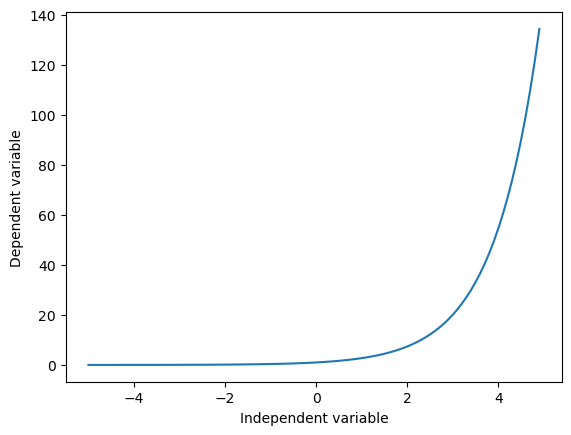

In [28]:
# Exponential function 
x = np.arange(-5.0, 5.0, 0.1)

y = np.exp(x)

plt.plot(x,y) 

plt.ylabel("Dependent variable")
plt.xlabel("Independent variable")
plt.show()

C:\Users\morie\AppData\Local\Temp\ipykernel_16044\882997170.py:4: RuntimeWarning: invalid value encountered in log
  y = np.log(x)


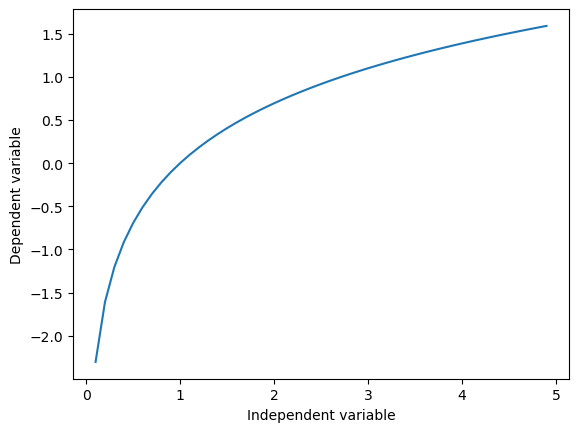

In [29]:
# Logarithmic function
x = np.arange(-5.0, 5.0, 0.1)

y = np.log(x)

plt.plot(x,y) 

plt.ylabel("Dependent variable")
plt.xlabel("Independent variable")
plt.show()

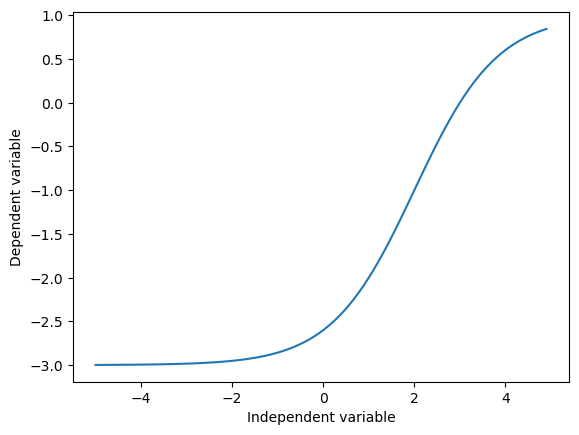

In [30]:
# Sigmoidal/logistic function
x = np.arange(-5.0, 5.0, 0.1)


y = 1-4/(1+np.power(3, x-2))

plt.plot(x,y) 

plt.ylabel("Dependent variable")
plt.xlabel("Independent variable")
plt.show()

In [31]:
# Download and read data
# !wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv
    
df = pd.read_csv("Data/china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


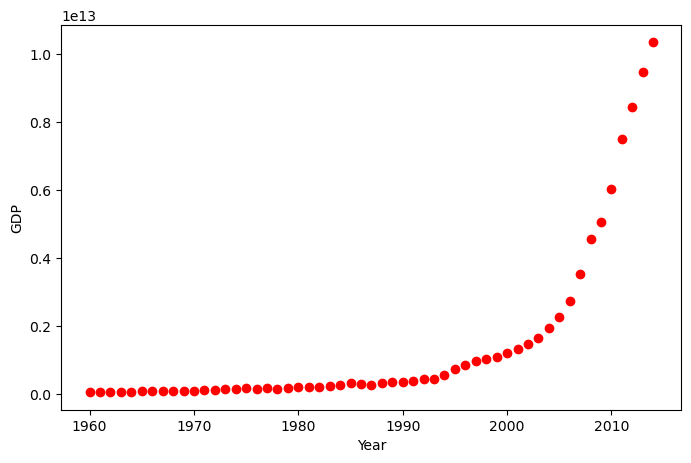

In [32]:
# Plot data
plt.figure(figsize=(8,5))

x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, "ro")

plt.ylabel("GDP")
plt.xlabel("Year")
plt.show()

In [33]:
# Modeling
# Build sigmoid function
def sigmoid(x, beta_1, beta_2):
     y = 1 / (1 + np.exp(-beta_1*(x-beta_2)))
     return y

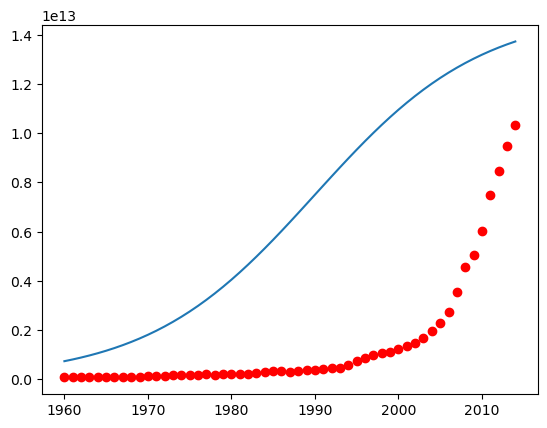

In [35]:
# Sample parameters
beta_1 = 0.10
beta_2 = 1990.0

# Apply sigmoid function
y_pred = sigmoid(x_data, beta_1 , beta_2)

# Plot initial prediction against datapoints
plt.plot(x_data, y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [36]:
# Normalize data
x_data_norm = x_data / max(x_data)
y_data_norm = y_data / max(y_data)

In [37]:
# Split data into train/test using a mask
msk = np.random.rand(len(df)) < 0.8
train_x = x_data_norm[msk]
train_y = y_data_norm[msk]

In [40]:
# Find best parameters
from scipy.optimize import curve_fit

popt, pcov = curve_fit(sigmoid, train_x, train_y)

# Print final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 699.291989, beta_2 = 0.997174


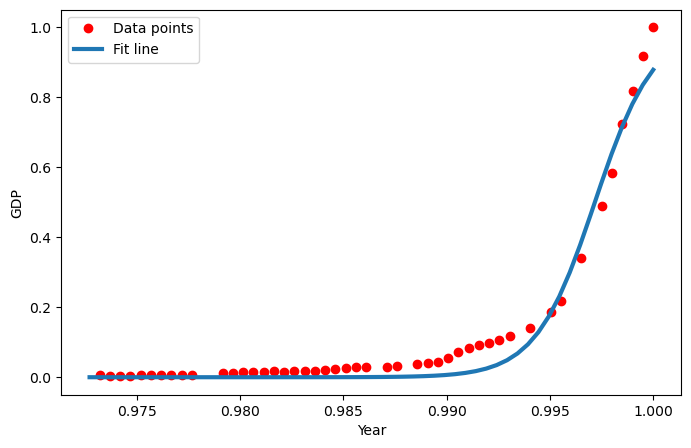

In [41]:
x = np.linspace(1960, 2015, 55)
x = x / max(x)
y = sigmoid(x, *popt)

plt.figure(figsize=(8,5))
plt.plot(train_x, train_y, "ro", label="Data points")
plt.plot(x, y, linewidth=3.0, label="Fit line")

plt.legend(loc="best")
plt.ylabel("GDP")
plt.xlabel("Year")
plt.show()

In [43]:
# Predict and evaluate model
from sklearn.metrics import r2_score

test_x = x_data_norm[~msk]
test_y = y_data_norm[~msk]

y_predicted = sigmoid(test_x, *popt)

print("Mean absolute error (MAE): %.2f" % np.mean(np.absolute(y_predicted - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_predicted - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, y_predicted))

Mean absolute error (MAE): 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.95
